In [2]:


import pandas as pd

data = {
    "Region": [
        "Tamil Nadu","Tamil Nadu","Tamil Nadu","Tamil Nadu","Tamil Nadu",
        "Karnataka","Karnataka","Karnataka","Karnataka","Karnataka",
        "Kerala","Kerala","Kerala","Kerala","Kerala",
        "Maharashtra","Maharashtra","Maharashtra","Maharashtra","Maharashtra"
    ],

    "Date": [
        "Jan-2020","Mar-2020","Apr-2020","Jun-2020","Sep-2020",
        "Jan-2020","Mar-2020","Apr-2020","Jun-2020","Sep-2020",
        "Jan-2020","Mar-2020","Apr-2020","Jun-2020","Sep-2020",
        "Jan-2020","Mar-2020","Apr-2020","Jun-2020","Sep-2020"
    ],

    "Estimated Unemployment Rate (%)": [
        5.2,6.5,12.5,9.0,7.8,
        4.8,7.2,15.3,10.2,8.9,
        6.1,8.5,18.2,12.0,9.5,
        5.9,9.0,20.5,14.3,11.0
    ]
}

df = pd.DataFrame(data)
df.to_csv("unemployment_data.csv", index=False)

print("Dataset Created Successfully!")
df.head()


Dataset Created Successfully!


,Region,Date,Estimated Unemployment Rate (%)
0,Tamil Nadu,Jan-2020,5.2
1,Tamil Nadu,Mar-2020,6.5
2,Tamil Nadu,Apr-2020,12.5
3,Tamil Nadu,Jun-2020,9.0
4,Tamil Nadu,Sep-2020,7.8


In [3]:
df = pd.read_csv("unemployment_data.csv")
df.head()


,Region,Date,Estimated Unemployment Rate (%)
0,Tamil Nadu,Jan-2020,5.2
1,Tamil Nadu,Mar-2020,6.5
2,Tamil Nadu,Apr-2020,12.5
3,Tamil Nadu,Jun-2020,9.0
4,Tamil Nadu,Sep-2020,7.8


In [4]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")
df.head()


/tmp/ipython-input-1277697705.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


,Region,Date,Estimated Unemployment Rate (%)
0,Tamil Nadu,2020-01-01,5.2
5,Karnataka,2020-01-01,4.8
10,Kerala,2020-01-01,6.1
15,Maharashtra,2020-01-01,5.9
1,Tamil Nadu,2020-03-01,6.5


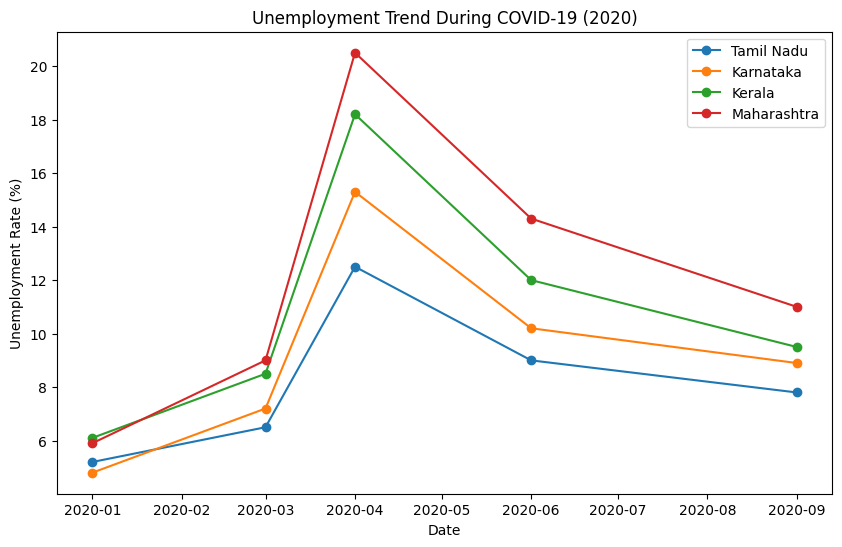

In [5]:
  import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for region in df["Region"].unique():
    region_data = df[df["Region"] == region]
    plt.plot(region_data["Date"],
             region_data["Estimated Unemployment Rate (%)"],
             marker='o',
             label=region)

plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Trend During COVID-19 (2020)")
plt.legend()
plt.show()


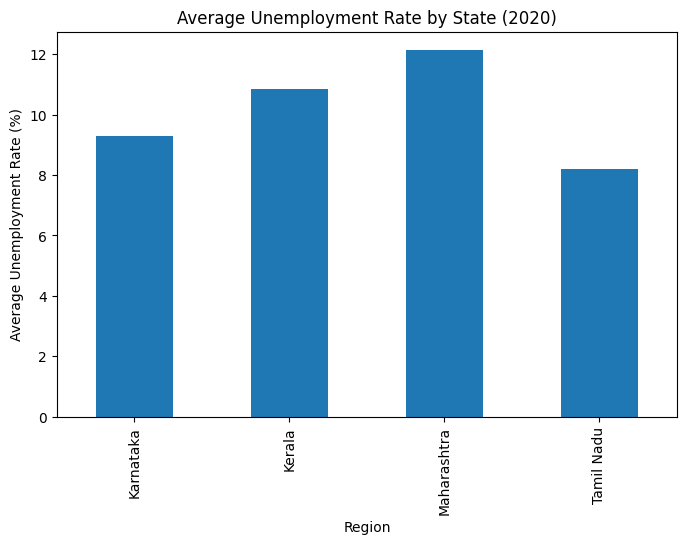

In [6]:
avg_unemployment = df.groupby("Region")["Estimated Unemployment Rate (%)"].mean()

plt.figure(figsize=(8,5))
avg_unemployment.plot(kind="bar")
plt.ylabel("Average Unemployment Rate (%)")
plt.title("Average Unemployment Rate by State (2020)")
plt.show()


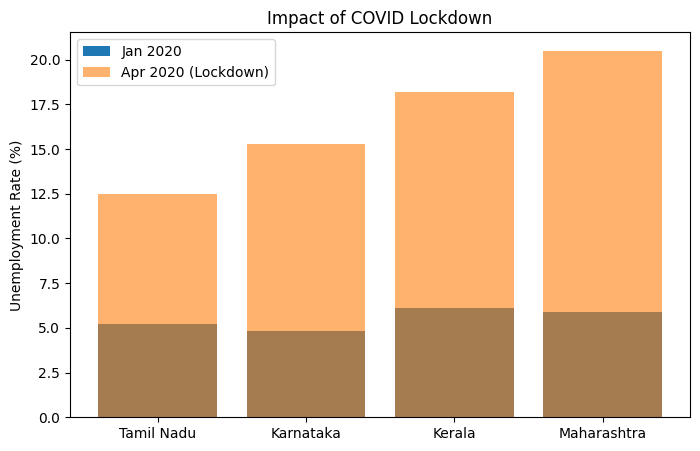

In [7]:
jan_data = df[df["Date"] == "2020-01-01"]
apr_data = df[df["Date"] == "2020-04-01"]

plt.figure(figsize=(8,5))

plt.bar(jan_data["Region"],
        jan_data["Estimated Unemployment Rate (%)"],
        label="Jan 2020")

plt.bar(apr_data["Region"],
        apr_data["Estimated Unemployment Rate (%)"],
        alpha=0.6,
        label="Apr 2020 (Lockdown)")

plt.ylabel("Unemployment Rate (%)")
plt.title("Impact of COVID Lockdown")
plt.legend()
plt.show()
